In [3]:
import numpy as np
import re
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
#nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
dataset = []
target = []
with open("sms/dataset.txt", 'r') as f:
    for x in f:
        if x[0:3]=="ham":
            target.append(1)
        else:
            target.append(0)
        data = re.sub(r"\W"," ", x)
        data = re.sub(r"ham","", x)
        data = re.sub(r"spam","", x)
        data = re.sub(r"\d"," ", x)
        data = re.sub(r"\s+[a-z]\s+"," ", x)
        data = re.sub(r"^[a-z]\s+"," ", x)
        data = re.sub(r"\s+[a-z]$"," ", x)
        data = re.sub(r"\s+"," ", x)
        data = data.lower()
        data = data.strip()
        dataset.append(data)
        

In [5]:
vectorizer = TfidfVectorizer(max_features=5574, min_df=3, max_df=0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(dataset).toarray()

In [6]:
text_train, text_test, sent_train, sent_test = train_test_split(X, target, test_size=0.2, random_state = 0)

In [7]:
classifier = LogisticRegression()
classifier.fit(text_train, sent_train)

sent_pred = classifier.predict(text_test)

cm = confusion_matrix(sent_test, sent_pred)

C:\Users\Anchal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
classifier.score(text_test, sent_test)

0.9865470852017937

In [9]:
(cm[0][0] + cm[1][1])*100/5574

19.73448152134912

In [16]:
len(sent_pred)

1115

In [19]:
len(sent_test)

1115

In [12]:
len(classifier.predict(text_test))

1115

In [23]:
neg =0
pos = 0
for i in sent_pred:
    if i==1:
        pos +=1
    else:
        neg +=1

In [25]:
pos

963

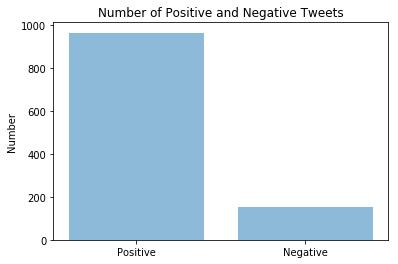

In [26]:

#Plotting the bar chart
import matplotlib.pyplot as plt
import numpy as np

objects = ['Positive', 'Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos, [pos, neg], alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets')
plt.show()